In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

dv001.ib.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/notebooks


In [2]:
import sys, os, pathlib
import numpy as np
import xarray as xr
import torch
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['DDEBACKEND'] = 'pytorch'
import deepxde

sys.path.append('..')
%aimport mre_pinn

torch.cuda.is_available()

Using backend: pytorch



True

In [3]:
%autoreload

cohort = mre_pinn.data.PatientCohort(xarray_dir='../data/NAFLD', patient_ids='0006')
#cohort.create_xarrays()
#cohort.save_xarrays()
#cohort.metadata
cohort.load_xarrays()

  0%|          | 0/1 [00:00<?, ?it/s]Loading ../data/NAFLD/0006/t1_pre_in.nc
Loading ../data/NAFLD/0006/t1_pre_water.nc
Loading ../data/NAFLD/0006/t1_pre_out.nc
Loading ../data/NAFLD/0006/t1_pre_fat.nc
Loading ../data/NAFLD/0006/t2.nc
Loading ../data/NAFLD/0006/mre_raw.nc
Loading ../data/NAFLD/0006/wave.nc
Loading ../data/NAFLD/0006/mre.nc
Loading ../data/NAFLD/0006/mask.nc
100%|██████████| 1/1 [00:00<00:00, 20.64it/s]


In [4]:
pde = mre_pinn.pde.WaveEquation.from_name('helmholtz', detach=True)
pde

In [28]:
%autoreload

pino = mre_pinn.model.SpectralTransformer(
    n_spatial_dims=3,
    n_channels_in=4,
    n_channels_out=1,
    n_spatial_freqs=128,
    n_channels_model=128,
    n_blocks=0,
    activ_fn='g',
    omega=30/300
)
pino

SpectralTransformer(
  (spectral_fwd): SpectralTransform()
  (spectral_inv): SpectralInverse()
)

In [29]:
%autoreload

model = mre_pinn.training.PINOModel(cohort, pino, pde, patch_size=None, batch_size=1)
model.compile(
    optimizer='adam',
    lr=1e-3,
    loss_weights=[1e-8, 1e0],
    loss=mre_pinn.training.losses.msae_loss
)   
test_eval = mre_pinn.testing.TestEvaluator(test_every=10, interact=True)

Compiling model...
'compile' took 0.000183 s



Training model...

0         [5.58e-04, 5.58e+04]    [5.58e-04, 5.58e+04]    []  


<IPython.core.display.Javascript object>


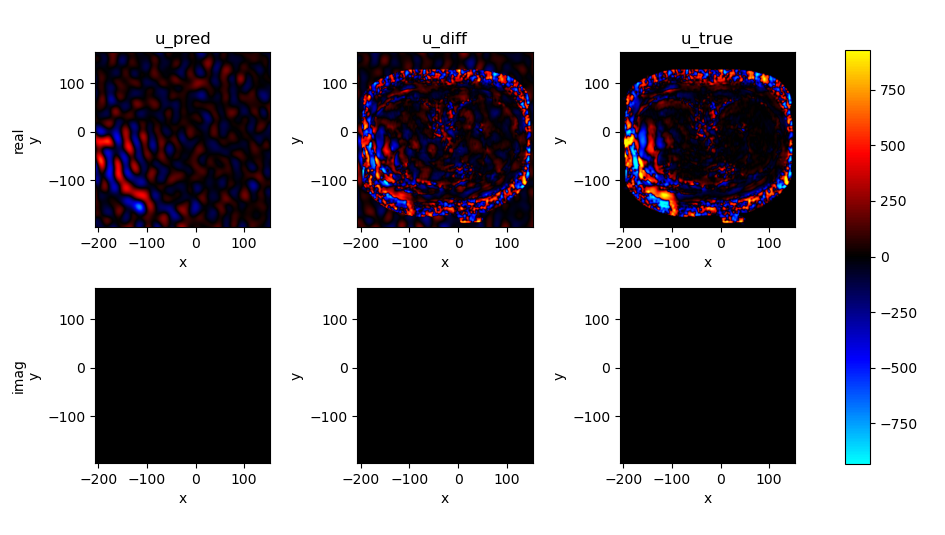

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

Time spent testing: 18.28%
10        [5.35e-04, 5.35e+04]    [5.35e-04, 5.35e+04]    []  
Time spent testing: 15.67%
20        [5.19e-04, 5.19e+04]    [5.19e-04, 5.19e+04]    []  
Time spent testing: 14.65%
30        [5.10e-04, 5.10e+04]    [5.10e-04, 5.10e+04]    []  
Time spent testing: 14.14%
40        [5.03e-04, 5.03e+04]    [5.03e-04, 5.03e+04]    []  
Time spent testing: 13.84%
50        [4.98e-04, 4.98e+04]    [4.98e-04, 4.98e+04]    []  
Time spent testing: 13.64%
60        [4.95e-04, 4.95e+04]    [4.95e-04, 4.95e+04]    []  
Time spent testing: 13.48%
70        [4.94e-04, 4.94e+04]    [4.94e-04, 4.94e+04]    []  
Time spent testing: 13.37%
80        [4.93e-04, 4.93e+04]    [4.93e-04, 4.93e+04]    []  
Time spent testing: 13.30%
90        [4.91e-04, 4.91e+04]    [4.91e-04, 4.91e+04]    []  
Time spent testing: 13.22%
100       [4.88e-04, 4.88e+04]    [4.88e-04, 4.88e+04]    []  
Time spent testing: 13.16%
110       [4.88e-04, 4.88e+04]    [4.88e-04, 4.88e+04]    []  
Time spent

920       [4.56e-04, 4.56e+04]    [4.56e-04, 4.56e+04]    []  
Time spent testing: 12.71%
930       [4.57e-04, 4.57e+04]    [4.57e-04, 4.57e+04]    []  
Time spent testing: 12.71%
940       [4.56e-04, 4.56e+04]    [4.56e-04, 4.56e+04]    []  
Time spent testing: 12.70%
950       [4.52e-04, 4.52e+04]    [4.52e-04, 4.52e+04]    []  
Time spent testing: 12.70%
960       [4.50e-04, 4.50e+04]    [4.50e-04, 4.50e+04]    []  
Time spent testing: 12.70%
970       [4.49e-04, 4.49e+04]    [4.49e-04, 4.49e+04]    []  
Time spent testing: 12.70%
980       [4.58e-04, 4.58e+04]    [4.58e-04, 4.58e+04]    []  
Time spent testing: 12.70%
990       [4.70e-04, 4.70e+04]    [4.70e-04, 4.70e+04]    []  
Time spent testing: 12.70%
1000      [4.63e-04, 4.63e+04]    [4.63e-04, 4.63e+04]    []  
Time spent testing: 12.70%
1010      [4.57e-04, 4.57e+04]    [4.57e-04, 4.57e+04]    []  
Time spent testing: 12.70%
1020      [4.53e-04, 4.53e+04]    [4.53e-04, 4.53e+04]    []  
Time spent testing: 12.70%
1030      

Time spent testing: 12.67%
1840      [4.40e-04, 4.40e+04]    [4.40e-04, 4.40e+04]    []  
Time spent testing: 12.67%
1850      [4.44e-04, 4.44e+04]    [4.44e-04, 4.44e+04]    []  
Time spent testing: 12.67%
1860      [4.41e-04, 4.41e+04]    [4.41e-04, 4.41e+04]    []  
Time spent testing: 12.67%
1870      [4.41e-04, 4.41e+04]    [4.41e-04, 4.41e+04]    []  
Time spent testing: 12.67%
1880      [4.40e-04, 4.40e+04]    [4.40e-04, 4.40e+04]    []  
Time spent testing: 12.67%
1890      [4.44e-04, 4.44e+04]    [4.44e-04, 4.44e+04]    []  
Time spent testing: 12.67%
1900      [4.41e-04, 4.41e+04]    [4.41e-04, 4.41e+04]    []  
Time spent testing: 12.67%
1910      [4.40e-04, 4.40e+04]    [4.40e-04, 4.40e+04]    []  
Time spent testing: 12.67%
1920      [4.44e-04, 4.44e+04]    [4.44e-04, 4.44e+04]    []  
Time spent testing: 12.67%
1930      [4.41e-04, 4.41e+04]    [4.41e-04, 4.41e+04]    []  
Time spent testing: 12.67%
1940      [4.39e-04, 4.39e+04]    [4.39e-04, 4.39e+04]    []  
Time spent

2750      [4.35e-04, 4.35e+04]    [4.35e-04, 4.35e+04]    []  
Time spent testing: 12.66%
2760      [4.35e-04, 4.35e+04]    [4.35e-04, 4.35e+04]    []  
Time spent testing: 12.66%
2770      [4.36e-04, 4.36e+04]    [4.36e-04, 4.36e+04]    []  
Time spent testing: 12.66%
2780      [4.36e-04, 4.36e+04]    [4.36e-04, 4.36e+04]    []  
Time spent testing: 12.66%
2790      [4.38e-04, 4.38e+04]    [4.38e-04, 4.38e+04]    []  
Time spent testing: 12.66%
2800      [4.35e-04, 4.35e+04]    [4.35e-04, 4.35e+04]    []  
Time spent testing: 12.66%
2810      [4.43e-04, 4.43e+04]    [4.43e-04, 4.43e+04]    []  
Time spent testing: 12.66%
2820      [4.48e-04, 4.48e+04]    [4.48e-04, 4.48e+04]    []  
Time spent testing: 12.66%
2830      [4.40e-04, 4.40e+04]    [4.40e-04, 4.40e+04]    []  
Time spent testing: 12.66%
2840      [4.39e-04, 4.39e+04]    [4.39e-04, 4.39e+04]    []  
Time spent testing: 12.66%
2850      [4.37e-04, 4.37e+04]    [4.37e-04, 4.37e+04]    []  
Time spent testing: 12.66%
2860      

Time spent testing: 12.66%
3670      [4.41e-04, 4.41e+04]    [4.41e-04, 4.41e+04]    []  
Time spent testing: 12.66%
3680      [4.39e-04, 4.39e+04]    [4.39e-04, 4.39e+04]    []  
Time spent testing: 12.66%
3690      [4.39e-04, 4.39e+04]    [4.39e-04, 4.39e+04]    []  
Time spent testing: 12.66%
3700      [4.35e-04, 4.35e+04]    [4.35e-04, 4.35e+04]    []  
Time spent testing: 12.66%
3710      [4.35e-04, 4.35e+04]    [4.35e-04, 4.35e+04]    []  
Time spent testing: 12.66%
3720      [4.39e-04, 4.39e+04]    [4.39e-04, 4.39e+04]    []  
Time spent testing: 12.66%
3730      [4.38e-04, 4.38e+04]    [4.38e-04, 4.38e+04]    []  
Time spent testing: 12.66%
3740      [4.49e-04, 4.49e+04]    [4.49e-04, 4.49e+04]    []  
Time spent testing: 12.66%
3750      [4.46e-04, 4.46e+04]    [4.46e-04, 4.46e+04]    []  
Time spent testing: 12.66%
3760      [4.59e-04, 4.59e+04]    [4.59e-04, 4.59e+04]    []  
Time spent testing: 12.66%
3770      [4.41e-04, 4.41e+04]    [4.41e-04, 4.41e+04]    []  
Time spent

4580      [4.32e-04, 4.32e+04]    [4.32e-04, 4.32e+04]    []  
Time spent testing: 12.66%
4590      [4.31e-04, 4.31e+04]    [4.31e-04, 4.31e+04]    []  
Time spent testing: 12.66%
4600      [4.31e-04, 4.31e+04]    [4.31e-04, 4.31e+04]    []  
Time spent testing: 12.66%
4610      [4.31e-04, 4.31e+04]    [4.31e-04, 4.31e+04]    []  
Time spent testing: 12.66%
4620      [4.29e-04, 4.29e+04]    [4.29e-04, 4.29e+04]    []  
Time spent testing: 12.66%
4630      [4.30e-04, 4.30e+04]    [4.30e-04, 4.30e+04]    []  
Time spent testing: 12.66%
4640      [4.33e-04, 4.33e+04]    [4.33e-04, 4.33e+04]    []  
Time spent testing: 12.66%
4650      [4.30e-04, 4.30e+04]    [4.30e-04, 4.30e+04]    []  
Time spent testing: 12.66%
4660      [4.29e-04, 4.29e+04]    [4.29e-04, 4.29e+04]    []  
Time spent testing: 12.66%
4670      [4.32e-04, 4.32e+04]    [4.32e-04, 4.32e+04]    []  
Time spent testing: 12.66%
4680      [4.29e-04, 4.29e+04]    [4.29e-04, 4.29e+04]    []  
Time spent testing: 12.66%
4690      

In [ ]:
model.train(10000, display_every=10, callbacks=[test_eval])